### Download the Dataset of Indicators from [Kaggle](https://www.kaggle.com/worldbank/world-development-indicators)

In [16]:
import pandas
import numpy
import random
import matplotlib.pyplot as plt

In [17]:
data=pandas.read_csv('./Indicators.csv')

# Top five rows of the  DataFrame

In [18]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


# Shape of Data

In [19]:
data.shape

(5656458, 6)

# Total Countries in the DataFrame

In [20]:
countries=data['CountryName'].unique().tolist()
len(countries)

247

In [21]:
countrycodes=data['CountryCode'].unique().tolist()
len(countrycodes)

247

# Total Indicators in the DataFrame

In [22]:
indicators=data['IndicatorName'].unique().tolist()
len(indicators)

1344

# Total Years Included

In [23]:
years=data['Year'].unique().tolist()
len(years)

56

Minimum and Maximum year

In [24]:
print(min(years)," " ,  max(years))

1960   2015


In [25]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


# CO2 emissions (metric tons per capita) in USA

In [26]:
mask1=data['CountryCode'].str.contains('USA')
mask2=data['IndicatorName'].str.contains('CO2 emissions \(metric tons per capita\)')

stage=data[mask1 & mask2]
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


In [27]:
stage.shape

(52, 6)

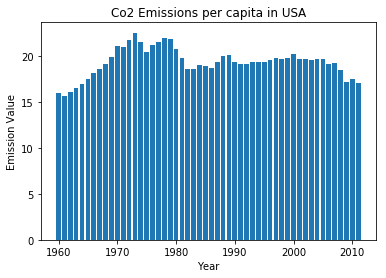

In [28]:
years = stage['Year']
co2=stage['Value']
plt.title('Co2 Emissions per capita in USA')

plt.xlabel("Year")
plt.ylabel('Emission Value')
plt.bar(years,co2)
plt.show()

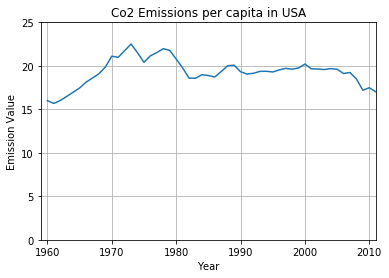

In [29]:
years = stage['Year'].values
co2=stage['Value'].values
plt.title('Co2 Emissions per capita in USA')

plt.xlabel("Year")
plt.ylabel('Emission Value')
plt.axis([1959,2011,0,25])
plt.plot(years,co2)
plt.grid(True)
plt.show()

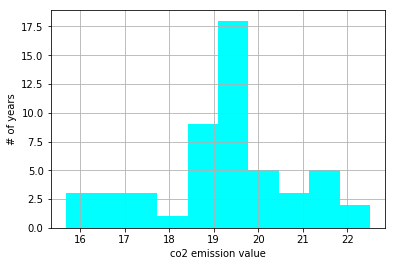

In [30]:
plt.hist(stage['Value'],facecolor='Aqua')
plt.xlabel('co2 emission value')
plt.ylabel('# of years')
plt.grid(True)
plt.show()

# CO2 emissions (metric tons per capita) in the Year 2011

In [31]:
year=2011
mask1=data['IndicatorName'].str.contains('CO2 emissions \(metric tons per capita\)')
mask2=data['Year'].isin([year])

co2_2011=data[mask1 & mask2]
co2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


In [32]:
co2_2011.shape

(232, 6)

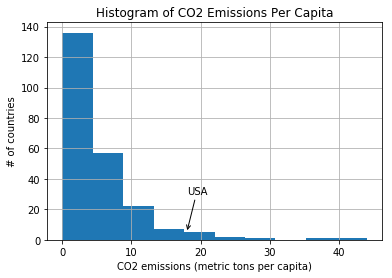

In [33]:
fig, ax = plt.subplots()
ax.annotate("USA",
             xy=(18,5),xycoords='data',
            xytext=(18, 30), textcoords='data',
             arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
             )
plt.hist(co2_2011['Value'])
plt.title('Histogram of CO2 Emissions Per Capita')
plt.xlabel(co2_2011['IndicatorName'].iloc[0])
plt.ylabel('# of countries')
plt.grid(True)
plt.show()

# Relationship Between GDP per capita and Co2 Emission in USA

In [34]:
mask1=data['IndicatorName'].str.contains('GDP per capita \(constant 2005')
mask2=data['CountryCode'].str.contains('USA')

gdp_stage=data[mask1 & mask2]
gdp_stage.tail()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5018182,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2010,43961.168477
5194861,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2011,44324.944522
5370008,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2012,45008.614113
5527438,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2013,45660.733802
5637323,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2014,46405.247065


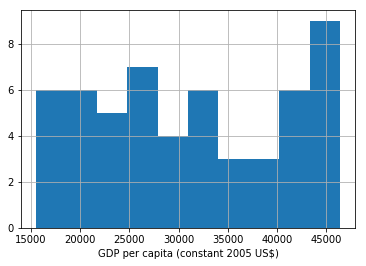

In [35]:
plt.hist(gdp_stage['Value'])

plt.xlabel(gdp_stage['IndicatorName'].iloc[0])
plt.ylabel('')
plt.grid(True)

In [36]:
#co2 emission in USA
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


Text(0.5, 0, 'Year')

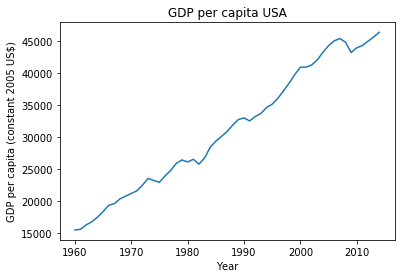

In [37]:
plt.plot(gdp_stage['Year'],gdp_stage['Value'])
plt.title("GDP per capita USA")
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])
plt.xlabel("Year")


In [38]:
stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256


In [39]:
gdp_stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657


In [40]:
print('Min year of CO2 Emission :',min(stage['Year']),'  Max year of C02 Emission :',max(stage['Year']))
print('Min year of GDP / Capita :',min(gdp_stage['Year']),'  Max year of GDP / Capita :',max(gdp_stage['Year']))

Min year of CO2 Emission : 1960   Max year of C02 Emission : 2011
Min year of GDP / Capita : 1960   Max year of GDP / Capita : 2014


In [41]:
gdp_stage_trunc=gdp_stage[gdp_stage['Year']<2012]

In [42]:
max(gdp_stage_trunc['Year'])

2011

In [43]:
print(len(stage["Year"]))
print(len(gdp_stage_trunc["Year"]))

52
52


In [44]:
stage.tail(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5018038,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2010,17.484792
5194727,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,17.020216


In [45]:
gdp_stage_trunc.tail(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5018182,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2010,43961.168477
5194861,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2011,44324.944522


Text(0.5, 1.0, 'CO2 Emissions vs. GDP \\(per capita\\)')

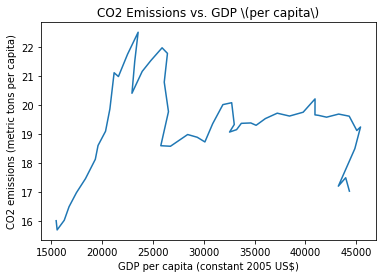

In [46]:
plt.plot(gdp_stage_trunc['Value'],stage['Value'])
plt.ylabel(stage['IndicatorName'].iloc[0])
plt.xlabel(gdp_stage_trunc['IndicatorName'].iloc[0])
plt.title("CO2 Emissions vs. GDP \(per capita\)")

# We will do the same plot by using the Scatter Plots

Text(0.5, 1.0, 'CO2 Emissions vs. GDP \\(per capita\\)')

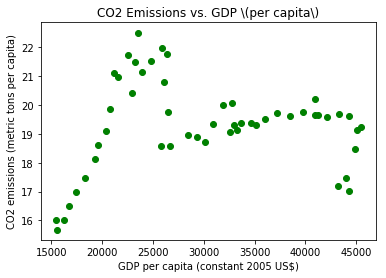

In [47]:
plt.scatter(gdp_stage_trunc['Value'],stage['Value'],c='g')
plt.ylabel(stage['IndicatorName'].iloc[0])
plt.xlabel(gdp_stage_trunc['IndicatorName'].iloc[0])
plt.title("CO2 Emissions vs. GDP \(per capita\)")

# Folium

In [48]:
import folium
from IPython.display import HTML

In [49]:
m=folium.Map(location=[29.9457,78.1642], zoom_start=12)

m.save('m.html')

HTML('<iframe src=m.html width=200 height=200> </iframe>')

In [50]:
x=folium.Map(location=[26.9124, 75.7873],zoom_start=12 )
x.save('x.html')
HTML('<iframe src=x.html width=300 height=300 > </iframe>' )

# Plotting of GDP per capita of year 2011 through Folium

In [51]:
data=pandas.read_csv('./Indicators.csv')
data.shape

(5656458, 6)

In [52]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [53]:
data.isnull().any()

CountryName      False
CountryCode      False
IndicatorName    False
IndicatorCode    False
Year             False
Value            False
dtype: bool

In [54]:
year=2011
mask1=data['IndicatorName'].str.contains('GDP per capita \(constant 2005')
mask2=data['Year'].isin([year])

gdp_stage=data[mask1 & mask2]

In [55]:
gdp_stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026388,Arab World,ARB,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2011,4334.680687
5026883,Caribbean small states,CSS,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2011,7332.752978
5027410,Central Europe and the Baltics,CEB,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2011,10105.823607
5027987,East Asia & Pacific (all income levels),EAS,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2011,5857.682008
5028611,East Asia & Pacific (developing only),EAP,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2011,2704.971790


In [56]:
gdp_stage.shape

(222, 6)

In [57]:
gdp_stage.isnull().any()

CountryName      False
CountryCode      False
IndicatorName    False
IndicatorCode    False
Year             False
Value            False
dtype: bool

In [58]:
gdp_stage['Year'].count()

222

In [59]:
gdp_stage['CountryCode'].count()

222

In [60]:
plot_data=gdp_stage[['CountryCode','Value']]
plot_data.head()

,CountryCode,Value
5026388,ARB,4334.680687
5026883,CSS,7332.752978
5027410,CEB,10105.823607
5027987,EAS,5857.682008
5028611,EAP,2704.971790


Text(0, 0.5, 'Value')

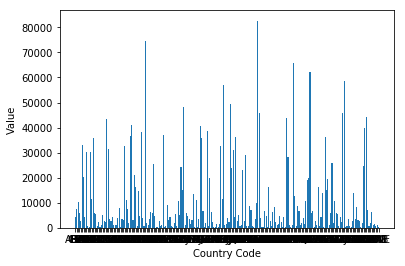

In [61]:

plt.bar(plot_data['CountryCode'],plot_data['Value'])
plt.xlabel('Country Code')
plt.ylabel('Value')

In [62]:
import folium
import pandas 

In [63]:
country_geo ='./world-countries.json'

In [64]:
GDP_Indicator=gdp_stage['IndicatorName'].iloc[0]

In [65]:
plot_map =folium.Map( location=[100,0], zoom_start=1.5 )


In [66]:
plot_map.choropleth(geo_data=country_geo, data=plot_data,
             columns=['CountryCode', 'Value'],
             key_on='feature.id',
             fill_color='YlGnBu', fill_opacity=.9, line_opacity=0.2,
             legend_name=GDP_Indicator)

C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:432: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [67]:
plot_map.save('plot_gdp_map.html')

In [68]:
from IPython.display import HTML
HTML('<iframe src=plot_gdp_map.html width=800 height=400 > </iframe>')

In [69]:
x=plot_data[plot_data['CountryCode'].str.contains('AUS')]
x

,CountryCode,Value
5054094,AUS,36560.441167
